# Digit Recognizer:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
## Load the training set
X_train = np.load('MNIST/train_data.npy')
y_train = np.load('MNIST/train_labels.npy')
## Load the testing set
X_test = np.load('MNIST/test_data.npy')
y_test = np.load('MNIST/test_labels.npy')

In [5]:
#X_val, y_val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=24)

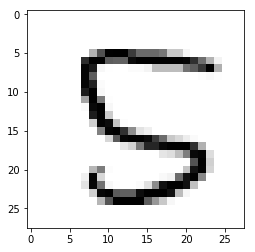

Label:  5


In [6]:
plt.imshow(X_train[1,].reshape(28,28), cmap="Greys")
plt.show()
print("Label: ", y_train[1])

## Linear model:

We will train a linear classifier $\vec{x} \rightarrow y$ with SGD using TensorFlow.

We  need to calculate a logit $z_k$ for each class: 
$$z_k = \vec{x} \cdot \vec{w_k} + b_k \quad k = 0..9$$

And transform logits $z_k$ to valid probabilities $p_k$ with softmax: 
$$p_k = \frac{e^{z_k}}{\sum_{i=0}^{9}{e^{z_i}}} \quad k = 0..9$$

We will use a cross-entropy loss to train our multi-class classifier:
$$\text{cross-entropy}(y, p) = -\sum_{k=0}^{9}{\log(p_k)[y = k]}$$ 

where 
$$
[x]=\begin{cases}
       1, \quad \text{if $x$ is true} \\
       0, \quad \text{otherwise}
    \end{cases}
$$

Cross-entropy minimization pushes $p_k$ close to 1 when $y = k$, which is what we want.

In [7]:
#Labels to One-hot-encoding
y_train_hot = keras.utils.to_categorical(y_train, 10)
y_val_hot = keras.utils.to_categorical(y_val, 10)

In [8]:
#Normalization:
#X_train = X_train/255 - 0.5 [for 0 centred data]
#X_val = X_val/255 - 0.5h

In [9]:
#Variables
W = tf.get_variable("x", shape=(784,10), dtype=tf.float32) 
b = tf.get_variable("b", shape=(1,10), dtype=tf.float32)

input_X = tf.placeholder(tf.float32, shape=(None,784))
input_y = tf.placeholder(tf.int32, shape=(None,10))

W0917 16:12:17.998793  7224 deprecation.py:506] From c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
#Compute softmax predictions & classes:
logits = input_X @ W + b
#probabilities
probas = tf.nn.softmax(logits)
#classes
classes = tf.argmax(probas, axis=1) 

In [12]:
#Loss and Optimization:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=input_y, logits=logits))
opt = tf.train.AdamOptimizer().minimize(loss)

### Batch Training:

In [17]:
BATCH_SIZE = 512
EPOCHS = 50
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:


for epoch in range(EPOCHS):
    batch_losses=[]
    
    for i in range(0, X_train.shape[0], BATCH_SIZE):
        _, bach_loss = sess.run([opt, loss], feed_dict={input_X: X_train[i:i+BATCH_SIZE],
                                                         input_y: y_train_hot[i:i+BATCH_SIZE]})
        batch_losses.append(bach_loss)
    
    #Train,Val losses
    train_loss = np.mean(batch_losses)
    val_loss = sess.run(loss,  feed_dict={input_X: X_val, input_y: y_val_hot}) 
    #Accuracy
    train_accuracy = accuracy_score(y_train, sess.run(classes, {input_X: X_train}))
    val_accuracy = accuracy_score(y_val, sess.run(classes, {input_X: X_val}))
    #print results
    print("EPOCH "+str(epoch)+": train_loss: {0: .4f}, val_loss: {1:.4f}, train_accuracy: {2:.4f}, val_accuracy: {3:.4f}"
          .format(train_loss, val_loss, train_accuracy, val_accuracy))

sess.close()

EPOCH 0: train_loss:  47.2523, val_loss: 32.7755, train_accuracy: 0.5517, val_accuracy: 0.5333
EPOCH 1: train_loss:  24.3874, val_loss: 22.1527, train_accuracy: 0.7013, val_accuracy: 0.6800
EPOCH 2: train_loss:  16.9595, val_loss: 17.3389, train_accuracy: 0.7583, val_accuracy: 0.7242
EPOCH 3: train_loss:  13.2176, val_loss: 14.7703, train_accuracy: 0.7971, val_accuracy: 0.7625
EPOCH 4: train_loss:  10.9839, val_loss: 13.1396, train_accuracy: 0.8194, val_accuracy: 0.7758
EPOCH 5: train_loss:  9.4354, val_loss: 12.2881, train_accuracy: 0.8363, val_accuracy: 0.7925
EPOCH 6: train_loss:  8.2774, val_loss: 11.5683, train_accuracy: 0.8462, val_accuracy: 0.8050
EPOCH 7: train_loss:  7.4109, val_loss: 11.0483, train_accuracy: 0.8575, val_accuracy: 0.8083
EPOCH 8: train_loss:  6.7023, val_loss: 10.6469, train_accuracy: 0.8642, val_accuracy: 0.8192
EPOCH 9: train_loss:  6.1200, val_loss: 10.3153, train_accuracy: 0.8698, val_accuracy: 0.8233
EPOCH 10: train_loss:  5.5931, val_loss: 10.0979, train

## Neural Net: 91% in validation accuracy

In [22]:
def create_NN():
    model1 = Sequential()
    model1.add(Dense(128, input_shape=(784,)))
    model1.add(Activation('sigmoid'))
    model1.add(Dense(128))
    model1.add(Activation('sigmoid'))
    model1.add(Dense(128))
    model1.add(Activation('sigmoid'))
    model1.add(Dense(10))
    model1.add(Activation('softmax'))
    return model1

In [23]:
model1 = create_NN()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
__________

In [25]:
model1.compile( loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

W0917 16:22:16.896091  7224 deprecation_wrapper.py:119] From c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 16:22:16.987040  7224 deprecation_wrapper.py:119] From c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [27]:
model1.fit(
    X_train, 
    y_train_hot,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val, y_val_hot),
)

Train on 4800 samples, validate on 1200 samples
Epoch 1/40
4800/4800 [==============================] - 0s 54us/step - loss: 0.1307 - acc: 0.9671 - val_loss: 0.2751 - val_acc: 0.9167
Epoch 2/40
4800/4800 [==============================] - 0s 55us/step - loss: 0.1338 - acc: 0.9658 - val_loss: 0.2834 - val_acc: 0.9125
Epoch 3/40
4800/4800 [==============================] - 0s 57us/step - loss: 0.1330 - acc: 0.9667 - val_loss: 0.2767 - val_acc: 0.9133
Epoch 4/40
4800/4800 [==============================] - 0s 50us/step - loss: 0.1263 - acc: 0.9669 - val_loss: 0.2864 - val_acc: 0.9183
Epoch 5/40
4800/4800 [==============================] - 0s 50us/step - loss: 0.1195 - acc: 0.9704 - val_loss: 0.2888 - val_acc: 0.9092
Epoch 6/40
4800/4800 [==============================] - 0s 52us/step - loss: 0.1216 - acc: 0.9708 - val_loss: 0.2800 - val_acc: 0.9125
Epoch 7/40
4800/4800 [==============================] - 0s 52us/step - loss: 0.1176 - acc: 0.9710 - val_loss: 0.2860 - val_acc: 0.9067
Epoch 8

## ConvNet: LeNet-5 Architecture( Val_acc ~ 96.67%)

<br>


<img src="LeNet.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

<br>

In [28]:
#Rechape X_train, X_val
X_train_r = np.reshape(X_train, [-1,28,28,1])
X_val_r   = np.reshape(X_val, [-1,28,28,1])

In [29]:
#Model
def create_CNN():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation="relu", input_shape=(28,28,1)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation="relu"))
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model    

In [30]:
#describe model
model2 = create_CNN()
model2.summary()

W0917 16:35:28.619404  7224 deprecation_wrapper.py:119] From c:\users\blender\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
__________

In [32]:
model2.compile( loss='categorical_crossentropy', optimizer=keras.optimizers.Adamax(), metrics=['accuracy'])

In [34]:
# fit model
model2.fit(
    X_train_r, y_train_hot,
    batch_size=512, 
    epochs=50,
    validation_data=(X_val_r, y_val_hot)
 )

Train on 4800 samples, validate on 1200 samples
Epoch 1/50
4800/4800 [==============================] - 5s 1ms/step - loss: 1.7075 - acc: 0.5048 - val_loss: 1.1304 - val_acc: 0.7500
Epoch 2/50
4800/4800 [==============================] - 4s 788us/step - loss: 0.8990 - acc: 0.8198 - val_loss: 0.7445 - val_acc: 0.8350
Epoch 3/50
4800/4800 [==============================] - 4s 845us/step - loss: 0.6117 - acc: 0.8869 - val_loss: 0.5415 - val_acc: 0.8875
Epoch 4/50
4800/4800 [==============================] - 4s 821us/step - loss: 0.4605 - acc: 0.9060 - val_loss: 0.4286 - val_acc: 0.9150
Epoch 5/50
4800/4800 [==============================] - 4s 834us/step - loss: 0.3667 - acc: 0.9246 - val_loss: 0.3639 - val_acc: 0.9275
Epoch 6/50
4800/4800 [==============================] - 4s 801us/step - loss: 0.3091 - acc: 0.9377 - val_loss: 0.3170 - val_acc: 0.9342
Epoch 7/50
4800/4800 [==============================] - 4s 934us/step - loss: 0.2664 - acc: 0.9506 - val_loss: 0.2840 - val_acc: 0.9342
Ep